# practice unsupervised learning

##### in this notebook we will practice and explore unsupervised learning techniques
##### in each section we will explore a different technique, and have a practical code example
##### the steps we will follow are:
##### 1. load the data
##### 2. explore and visualized the data
##### 3. preprocess the data
##### 4. evaluate the performance of some clustering algorithms
##### 5. visualize the clusters
##### 6. evaluate the performance of some dimensionality reduction algorithms
##### 7. visualize the data in 2D
##### 8. visualize the data in 3D


In [7]:
# step 1. import all the required libraries for unsupervised learning and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



In [21]:
# load the data
# create a first function to load the data and give some statistical information, 
# the input of this function is the path of the file and the output is the data frame
def load_and_view_data(path):
    df = pd.read_csv(path)
    print(f'the shape of the data is {df.shape}\n')
    print(f'the columns of the data are \n {df.columns.to_list()}\n')
    # print(f'first 5 rows of the data are {df.head()}\n')
    # print(f'the statistical information of the data is {df.describe()}\n')
    print(f'information about the data is {df.info()}\n')
    print(f'number of missing values {df.isnull().sum()}\n')
    print(f'duplicate values {df.duplicated().sum()}\n')
    print(f'number of unique values {df.nunique()}\n')
    print(f'number of unique values in each column {df.nunique()}\n')
    return df
df = load_and_view_data(r'C:\Users\nirro\Downloads\Credit Card Dataset for Clustering\CC GENERAL.csv')

the shape of the data is (8950, 18)

the columns of the data are 
 ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES        

In [22]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [23]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


column name is BALANCE


<Figure size 200x200 with 0 Axes>

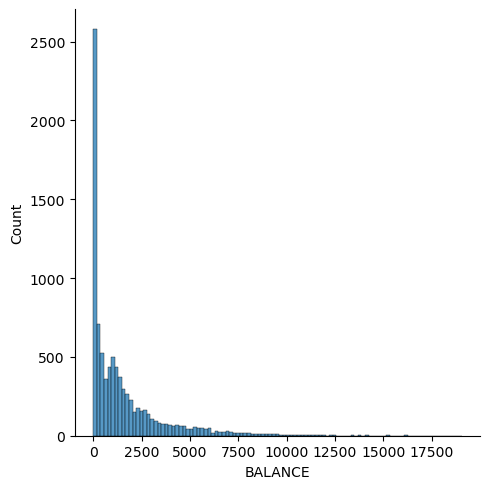

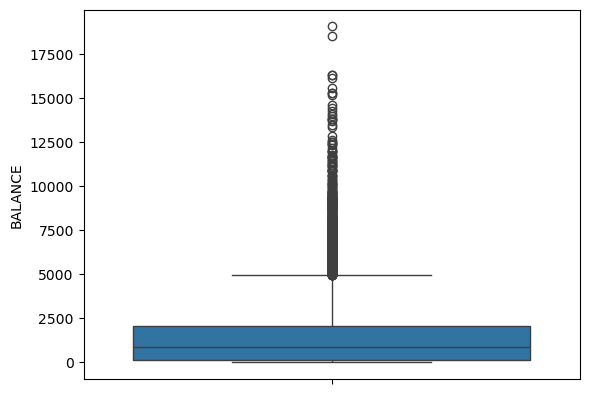

column name is BALANCE_FREQUENCY


<Figure size 200x200 with 0 Axes>

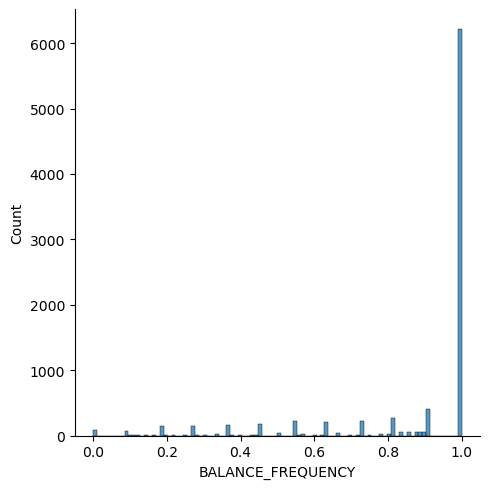

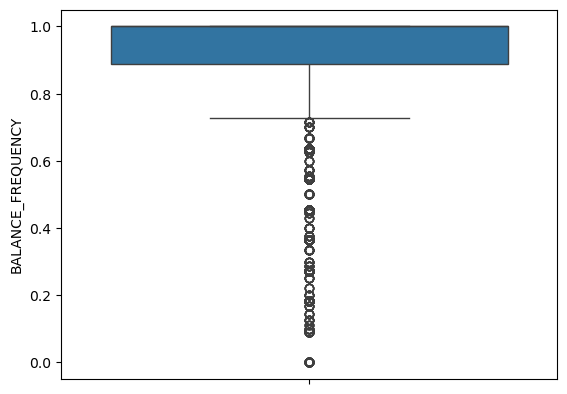

column name is PURCHASES


<Figure size 200x200 with 0 Axes>

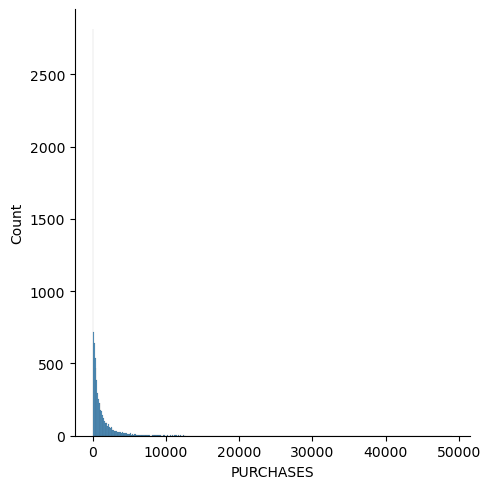

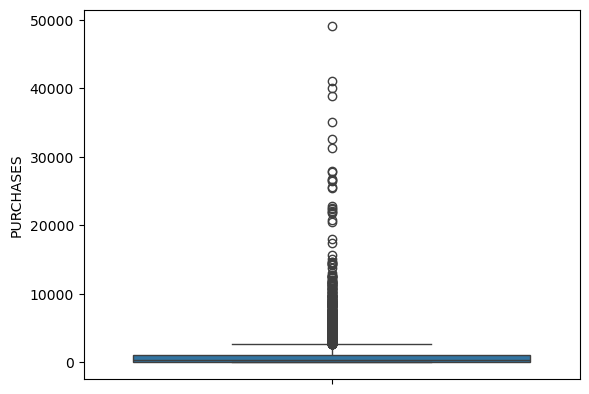

column name is ONEOFF_PURCHASES


<Figure size 200x200 with 0 Axes>

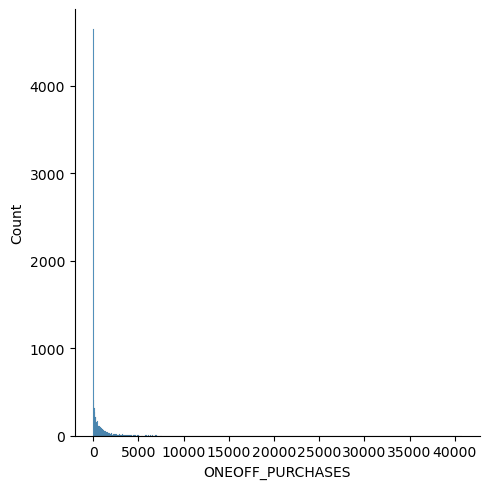

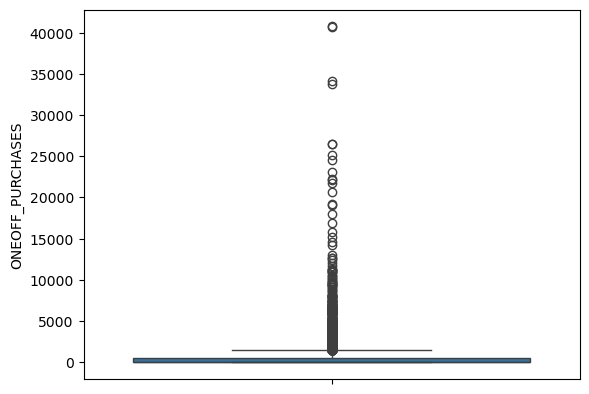

column name is INSTALLMENTS_PURCHASES


<Figure size 200x200 with 0 Axes>

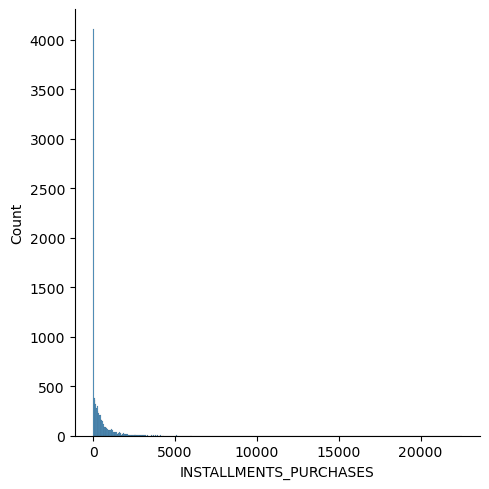

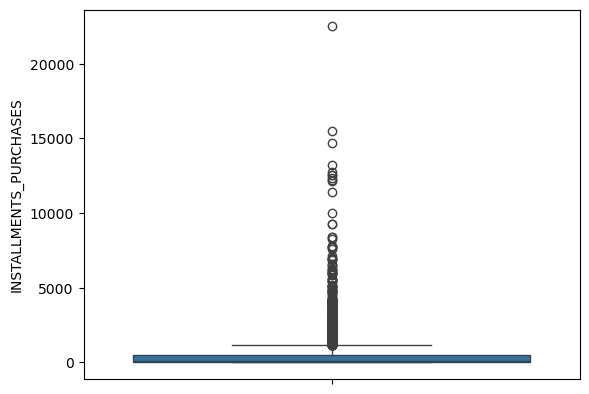

column name is CASH_ADVANCE


<Figure size 200x200 with 0 Axes>

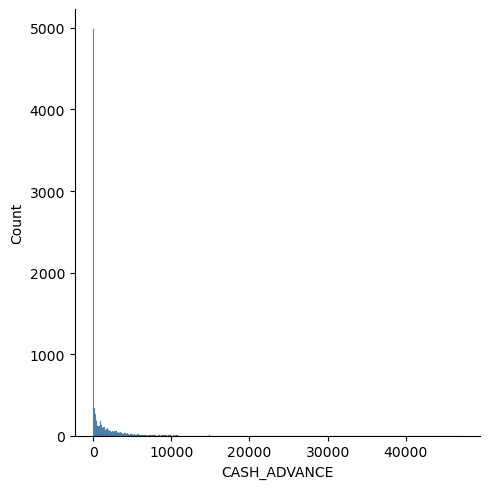

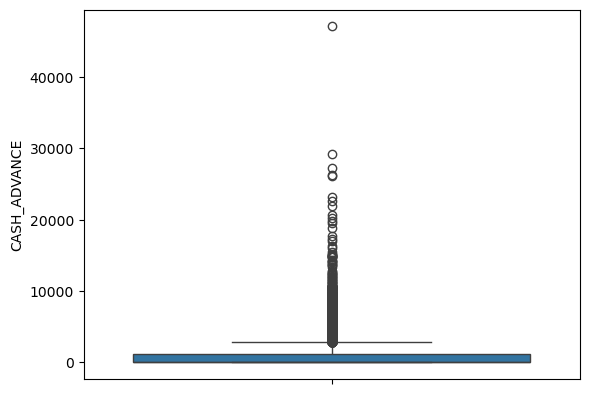

column name is PURCHASES_FREQUENCY


<Figure size 200x200 with 0 Axes>

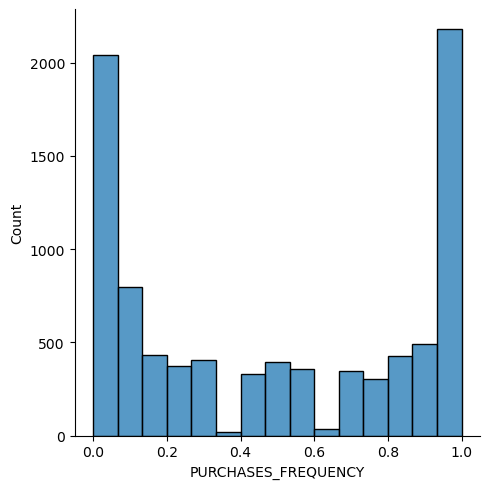

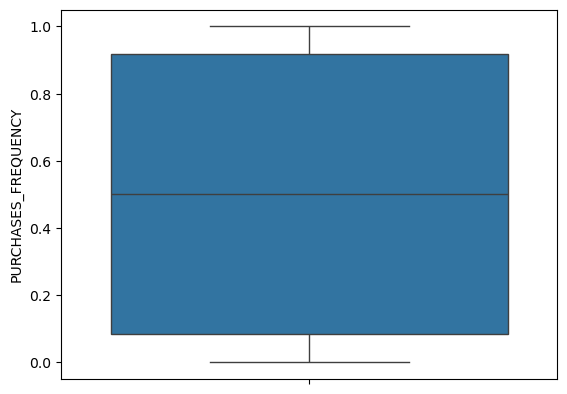

column name is ONEOFF_PURCHASES_FREQUENCY


<Figure size 200x200 with 0 Axes>

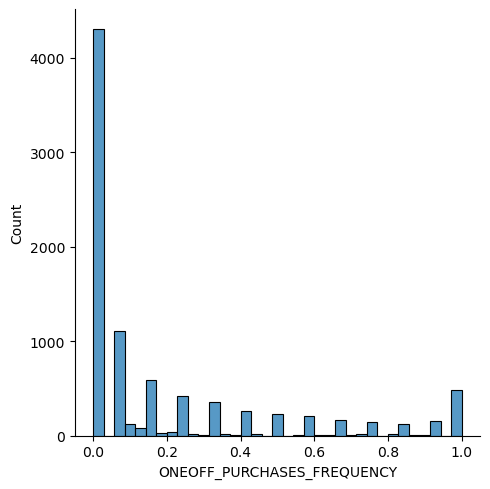

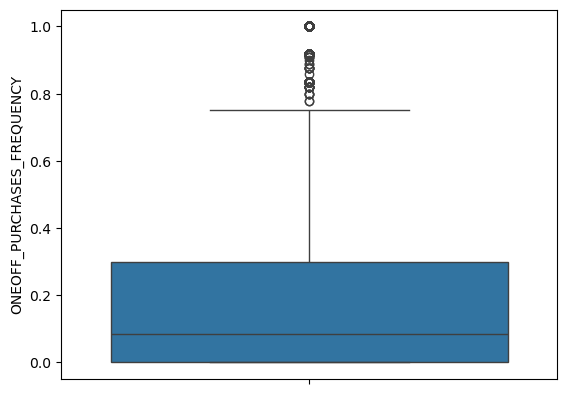

column name is PURCHASES_INSTALLMENTS_FREQUENCY


<Figure size 200x200 with 0 Axes>

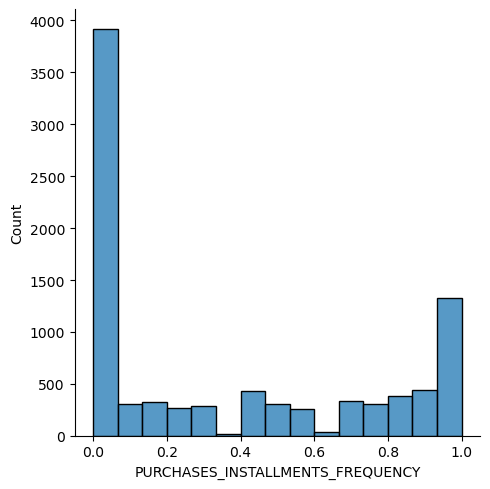

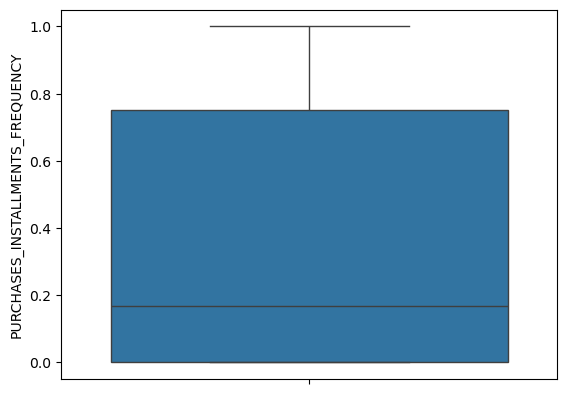

column name is CASH_ADVANCE_FREQUENCY


<Figure size 200x200 with 0 Axes>

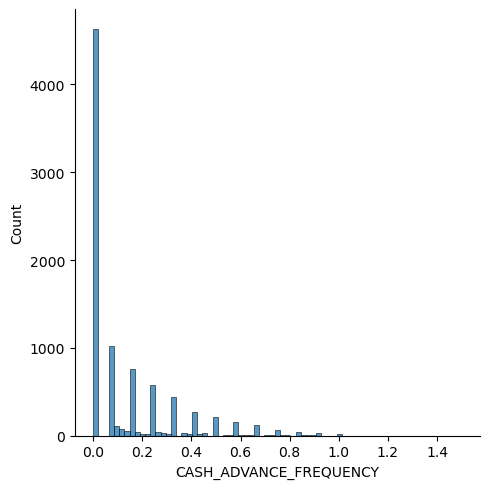

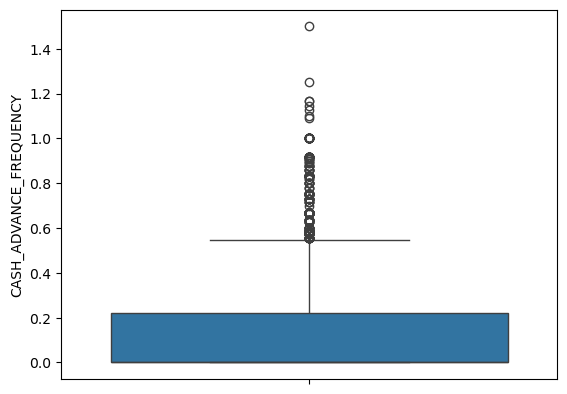

column name is CASH_ADVANCE_TRX


<Figure size 200x200 with 0 Axes>

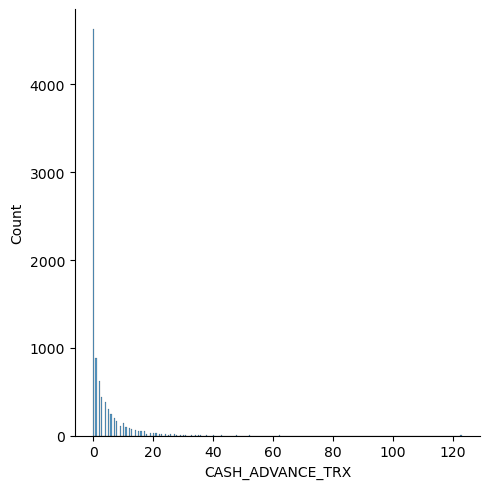

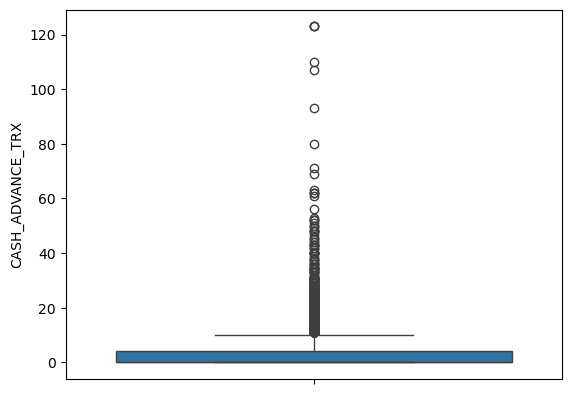

column name is PURCHASES_TRX


<Figure size 200x200 with 0 Axes>

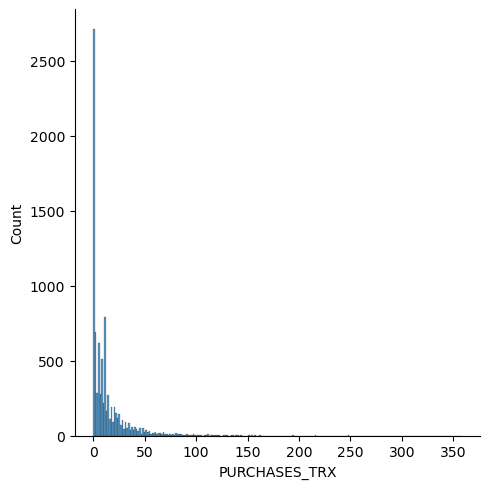

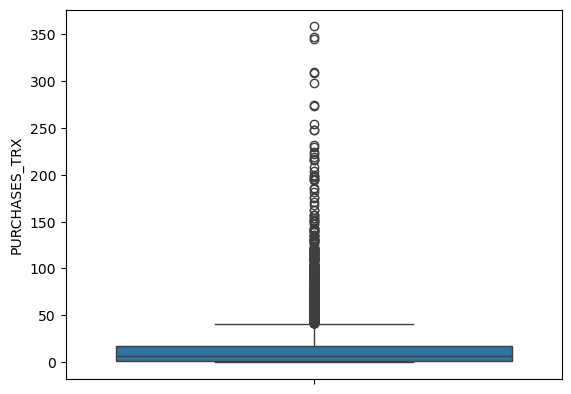

column name is CREDIT_LIMIT


<Figure size 200x200 with 0 Axes>

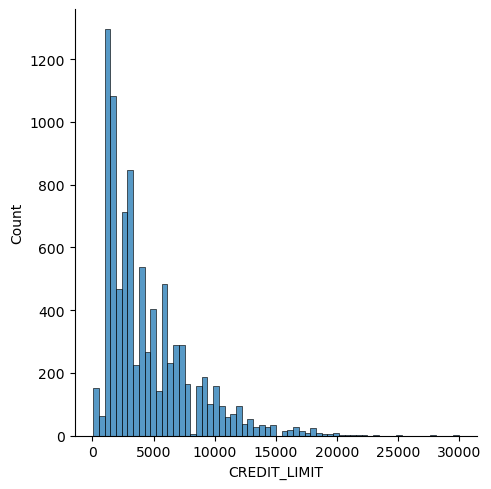

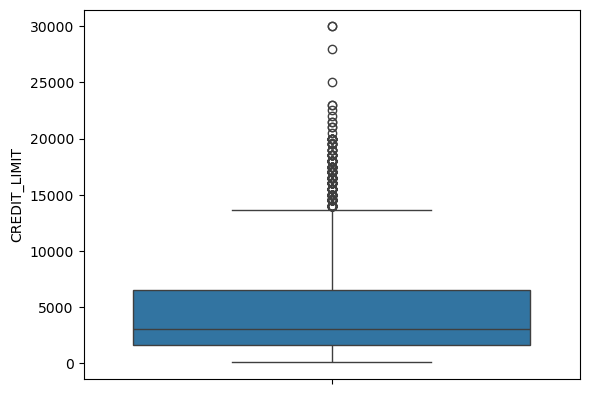

column name is PAYMENTS


<Figure size 200x200 with 0 Axes>

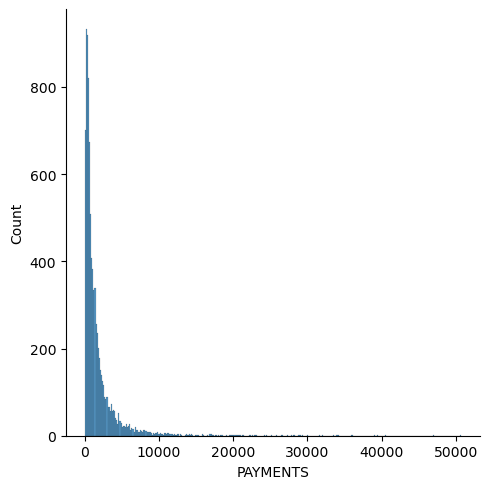

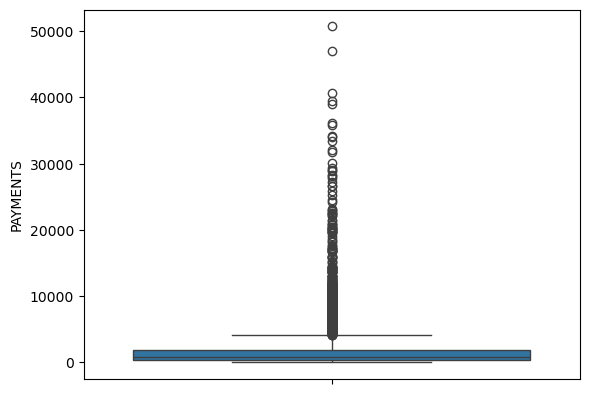

column name is MINIMUM_PAYMENTS


<Figure size 200x200 with 0 Axes>

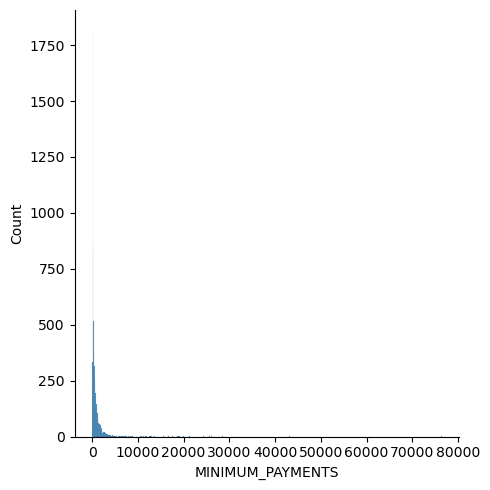

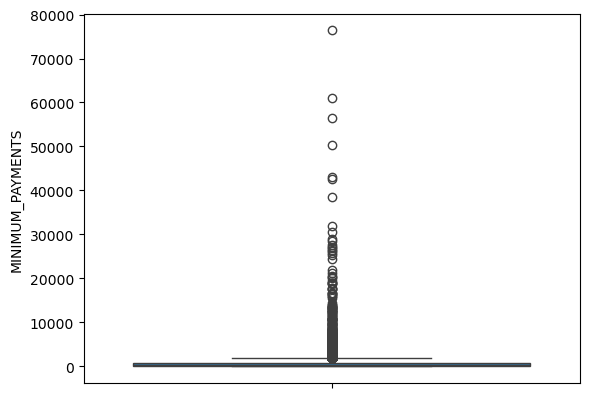

column name is PRC_FULL_PAYMENT


<Figure size 200x200 with 0 Axes>

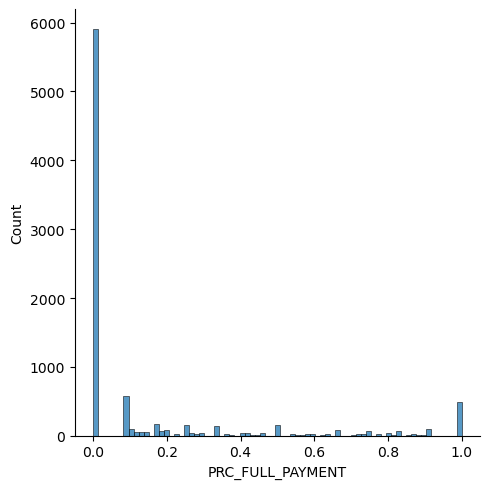

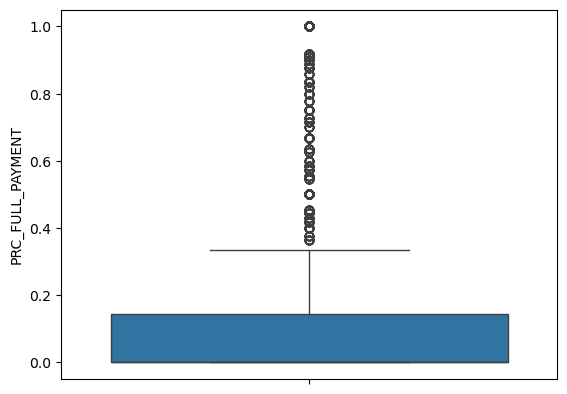

column name is TENURE


<Figure size 200x200 with 0 Axes>

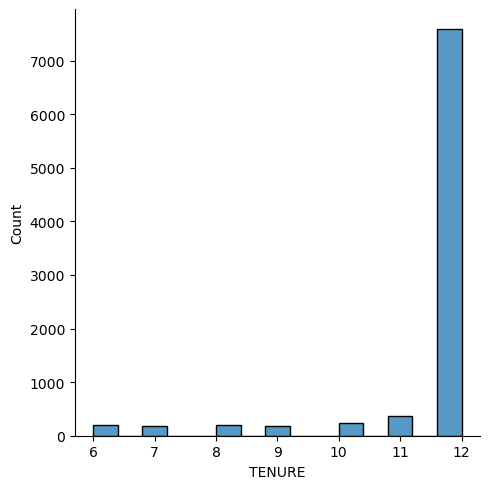

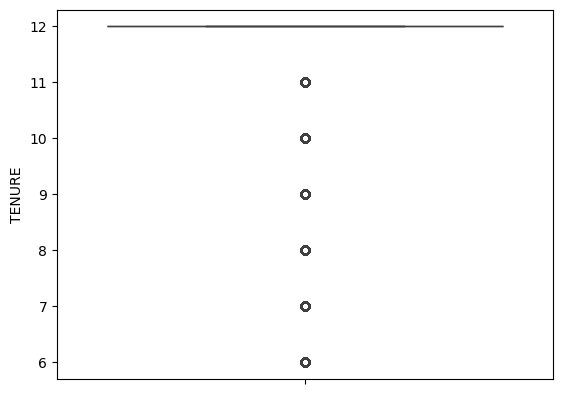

In [33]:
# view the data using plots
# create a function to plot the data
def view_raw_data(df):
    for col in df.columns:
        if df[col].dtype == 'object'  and df[col].nunique()<10:
            print(f'column name is {col}')
            sns.countplot(df[col])
            plt.show()
        elif df[col].dtype != 'object':
            print(f'column name is {col}')
            plt.figure(figsize=(2,2))
            sns.displot(df[col])
            plt.show()
            sns.boxplot(df[col])    
            plt.show()
view_raw_data(df)